# Tutorial to learn how to use the PyGEMMES library

# Welcome in PyGEMMES as a user !

This code is the perfect place to learn how to use GEMMES.
Please execute it with a ipython notebook to try and see each section
You can use https://nbviewer.jupyter.org/ to see it in a userfriendly interface ( you will not run the code but see the results)

In [27]:
# Imports 
import numpy as np              # Can be practical to create arrays 
import matplotlib.pyplot as plt # Can be practical to do on-the-fly plots

import _core           # The core of the model that does all operations
import _plots as plots # The plots to do manually some plots 


## Get the informations on what is available 

There are already models accessible in the code, and some fields already exist. It is good practice to get to know them first.
There are two things to look at : 
* **Models** which contains logic linking fields 
* The **library** containing the definition of fields shared through models

### Information on different models

In [28]:
_core._class_checks.models.get_available_models() # print the list of all models 
LISTOFMODELS = _core._class_checks.models.get_available_models(returnas=list) # get the list of all models

############################################################
The following predefined models are currently available:
	- GK
	- G_Reduced
	- TEMPLATE


In [29]:
_core._class_checks.models.describe_ALL_available_models() # The description of each models 

### DESCRIPTION OF GK ######################################
# Location    : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\_model_GK.py
# Description :
 

    DESCRIPTION : This is a Goodwin model based on extensive variables.
    Inflation not integrated to the process
    TYPICAL BEHAVIOR : Convergence toward solow point ( good equilibrium) or debt crisis
    LINKTOARTICLE :
    
# VARIABLES   :
Section : ode
     a          Exogenous technical progress as an exponential
     N          Exogenous population as an exponential
     K          Capital evolution from investment and depreciation
     D          Debt as Investment-Profit difference
     W          salary through negociation
     p          NO INFLATION FOR THE MOMENT
Section : statevar
     Y          Leontiev optimized production function 
     GDP        Output with selling price 
     inflation  INFLATION NOT CODED
     L          Full instant employement based on capital
     Pi         Profit for production-Sala

In [30]:
_core._class_checks.models.describe_available_model('GK') # Just to know the information of GK



### DESCRIPTION OF GK ######################################
# Location    : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\_model_GK.py
# Description :
 

    DESCRIPTION : This is a Goodwin model based on extensive variables.
    Inflation not integrated to the process
    TYPICAL BEHAVIOR : Convergence toward solow point ( good equilibrium) or debt crisis
    LINKTOARTICLE :
    
# VARIABLES   :
Section : ode
     a          Exogenous technical progress as an exponential
     N          Exogenous population as an exponential
     K          Capital evolution from investment and depreciation
     D          Debt as Investment-Profit difference
     W          salary through negociation
     p          NO INFLATION FOR THE MOMENT
Section : statevar
     Y          Leontiev optimized production function 
     GDP        Output with selling price 
     inflation  INFLATION NOT CODED
     L          Full instant employement based on capital
     Pi         Profit for production-Sala

### Information on the shared field library

This is just giving you the very essential information for each. They are grouped so that it is easier to find what you are looking for !

In [31]:
_core._class_checks.models.PrintDFIELDS() # To have information on what is in the library

### DESCRIPTION OF THE DEFAULT LIBRARY #####################

### group : Numerical ######
key   definition                   value   type           units
----  ---------------------------  ------  -------------  -----
Tmax  Total simulated time         100     Extensive      y    
dt    time between two steps       0.01    Extensive      y    
nt    Number of timestep                   dimensionless  None 
nx    NUMBER OF PARRALLEL SYSTEMS  1       Extensive      y    
time  Time vector                  ode :0  Extensive      y    

### group : Investment #####
key    definition                                   value                 type           units
-----  -------------------------------------------  --------------------  -------------  -----
kappa  Part of GDP in investment                    None                  dimensionless  None 
k0     Percent of GDP invested when profit is zero  -0.0065               dimensionless  None 
k1     Investment slope                            

## Loading the model in the hub

Hub load the model, Load what he needs from the library, and fill what he needs to effectively solve the model
The system will print each step he adds so that you can put them in the model file !

For the moment the system will in any case find these information by himself you cannot give them.

### What happens when I initiate the hub ?
* The hub find your model file and read it
* The hub read the library
* The program determine what are the parameters in the system
* The program mixes both source to get everything he needs
* The program verify the integrity of your data
* Find all the variable that carry the same dimensions
* Find the order of resolution of equations


In [32]:
NAMEOFTHEMODEL = 'GK'              
hub = _core.Hub(NAMEOFTHEMODEL) 

*** Parameters list identified as :
 ['delta', 'phi1', 'k1', 'r', 'beta', 'alpha', 'k2', 'k0', 'phi0']
*** Fields not existing in library autofilled by the system :
p                Is autofilled from model
inflation        Is autofilled from model
***No functions order given. Automatic order filling...
['inflation', 'Y', 'L', 'GDP', 'Pi', 'lambda', 'omega', 'phillips', 'kappa', 'd', 'I', 'pi']


## Getting information on the loaded system 

There are four ways to get informations about the loaded system through the hub

1. just calling the hub `hub` that gives you:
    * the model name
    * the number of parameters
    * the number of ODE 
    * the number of state variables
    * the flag if it has run or not
    number of variable and parameters. Do not worry: )
2. `hub.get_summary()` that gives you all useful informations
    * The numerical parameters
    * The model parameters and their value
    * The functions, their expression, their initial value
    * If the run is done, it will also add the final values !
3. `hub.get_dparam()` will return or print all the data of the model. Should be controlled through keywords
4. `hub.get_variables_compact()` will return an array of the time evolution and the corresponding keys

* `sol.get_summary()` is good practice before launching the run, or after to check final values
* `sol.get_dparam(returnas = dict)` is good practice for manual solution exploration
* sol.get_variable_compact is good practice for simple plots


In [33]:
hub # minimal print with a few infos

model  nb. model param  nb. ode  nb. statevar  run  
-----  ---------------  -------  ------------  -----
GK     9                7        12            False


    DESCRIPTION : This is a Goodwin model based on extensive variables.
    Inflation not integrated to the process
    TYPICAL BEHAVIOR : Convergence toward solow point ( good equilibrium) or debt crisis
    LINKTOARTICLE :
    

In [34]:
hub.get_summary() # Recommended for full understanding of the system state 

Numerical param.  value  units  definition                   comment    
----------------  -----  -----  ---------------------------  -----------
Tmax              100    y      Total simulated time                    
dt                0.01   y      time between two steps                  
nt                10000  None   Number of timestep           Constant dt
nx                1      y      NUMBER OF PARRALLEL SYSTEMS             

Model param.  value                  units   group               definition                                   comment                 
------------  ---------------------  ------  ------------------  -------------------------------------------  ------------------------
nu            3                      None    CORE                Kapital to output ratio                      OVERLOADING A DEFINITION
delta         0.005                  y^{-1}  CORE                Rate of capital depletion                                            
phi1          6.41025

## Tweak the system parameters and values 

The model if loaded like that will have only values : 
* From the default library
* From the model if explicitely declared in the model

You might want to do some other things such as : 
* Changing one parameter value 
* Changing multiple parameters values
* Load an entire preset defined by the modeller

### Modify one or multiple values 

To do so, you simply have to send a dictionnary with the logic key : value to be changed, the value being a float ( parrallel system coming soon )

`hub.Change_Attributes({'nu': 2.97,
                        'K': 2.75})`
                        

### Load a preset 

You can first find the list of preset by asking the system 
* `presetlist = hub.get_presets(returnas=list)` (the list of preset names)
* `presetdic = hub.get_presets(returnas=dict)` (the dictionnary of presets if you want to edit them)
* `hub.get_presets()` (to print the preset)

You then have simply to load the preset :
* by its name `hub.set_preset('default')` default being here the name of a preset
* by its dictionnary `hub.Change_Attributes(presetdic['default']['fields']`

**Anytime you change a parameter, the temporal simulation will be reset (you have to do a run again)**

## Run the simulation 

There is a choice of solvers : 
* 'eRK4-homemade' (One we created by ourself, that we can tweak)
* 'eRK2-scipy'    (an Runge Kutta solver of order 2)
* 'eRK4-scipy'    (an Runge Kutta solver of order 4)
* 'eRK8-scipy'    (an Runge Kutta solver of order 8)

We can also ask the solver to give more or less information about where it is in the resolution : 
* 0 print nothing
* 1 print all steps number but on the same line 
* 2 print all steps each time on the same line 
* 1.1 (or any float) will print the number of the iteration every time this value of time is spent (1.1 will give a print every 1.1 seconds)
When using an IDE, use either 0 or a float (IDE don't work well with 1 and 2)

Scipy solvers can also have more kwargs to be added for more precision : 
`atol` abolute error
`rtol` relative error
`max_time_step` maximal timestep

If you send a run, then send one again, the system will reset himself just before

In [35]:
hub.run(verb=.1)

time step 481 / 10000
time step 947 / 10000
time step 1415 / 10000
time step 1910 / 10000
time step 2416 / 10000
time step 2953 / 10000
time step 3458 / 10000
time step 3969 / 10000
time step 4478 / 10000
time step 4957 / 10000
time step 5422 / 10000
time step 5893 / 10000
time step 6366 / 10000
time step 6832 / 10000
time step 7276 / 10000
time step 7659 / 10000
time step 8084 / 10000
time step 8408 / 10000
time step 8790 / 10000
time step 9192 / 10000
time step 9598 / 10000
time step 10000 / 10000


## Getting more analyses 

The hub now contains the raw results of the simulation, but one can launch some analyses to get more informations on it, that will be placed in `hub._dparams()`. 

### Analysis of cycles 
Two dynamics are happening at the same type in our typical systems :
* Fast oscillations (called economic cycles)
* Slow evolution (closer to what you are used to in general equilibrium models)

To get the analysis of both phenomena, use.
`hub.FillCyclesForAllVar(ref='lambda', idx='all')`
It finds the cycle in variables, then calculate the properties of each cycles separately. 
* `ref` is a reference the system will use to find the cycle. if `ref='lambda'` the system will detect cycles on lambda and consider them to be the cycles of other variables. if you don't specify, each variable will detect cycles on itself.
* `idx` is the index of the sytem you want to look at when they work in parrallel. if idx='all' all systems are analyzed.

by doing so, each variable will have a key 'cycles' containing all the information relative to it.

In [36]:
hub.FillCyclesForAllVar(ref='lambda', idx='all')

## Look at the values in the model 

1. `hub.get_dparam()` will return or print all the data of the model. Should be controlled through keywords
2. `hub.get_variables_compact()` will return an array of the time evolution and the corresponding keys

* sol.get_dparam(returnas = dict) is good practice for solution exploration
* sol.get_variable_compact is good practice for simple plots or fast access

### To use get_dparam :
```
lcrit={'dimension': [],
         'units': [],
         'type': [],
         'group': [],
         'eqtype': []}
lprint = [
    'parameter',
    'value',
    'units',
    'dimension',
    'symbol',
    'type',
    'eqtype',
    'group',
    'comment', ]
Returnas = [dict,           # dictionnary
            'DataGFrame',   # a pandas DataFrame
            np.ndarray,     # a dict of np.ndarrays
            False           # return nothing(useful of verb=True)
            ]
Verb2 = [True,   # pretty-print the chosen parameters
         False,  # print nothing
         ]
```         
         
       

In [37]:
ResultDict = hub.get_dparam(Returnas = dict) # The dictionnary containing everything

parameter  value                  units                         dimension                                                     symbol     type           eqtype      group               comment
---------  ---------------------  ----------------------------  ------------------------------------------------------------  ---------  -------------  ----------  ------------------  -------
a          (10000, 1)             units.humans^{-1}.years^{-1}  {'Multiplier': 1, 'units': 1, 'humans': '-1', 'years': '-1'}  a          Intensive      ode         CORE                None   
N          (10000, 1)             humans                        {'Multiplier': 1, 'humans': 1}                                N          Extensive      ode         CORE                None   
K          (10000, 1)             units                         {'Multiplier': 1, 'units': 1}                                 K          Extensive      ode         CORE                None   
D          (10000, 1)             dollar

## Plot your stuff ! 

There is a list of plots that are by default for every model, if you load a preset it will also add some more plots. Here are all the ones by default 

### Plot one variable 

To plot one variable, use : 
`plots.Var(hub, key, idx=0, cycles=True, log=True)` with :
* `key` the name of the variable 
* `cycles` = True if you want the cycling properties to appear
* `idx` the number of the system you want to analyze (0 by default)
* `log` if you want the graph to be in log units

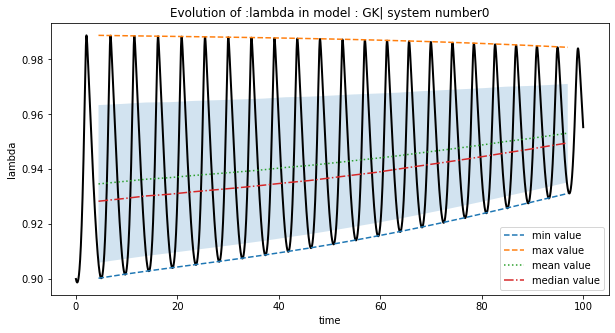

In [38]:
plots.Var(hub, 'lambda', idx=0, cycles=True, log=False)

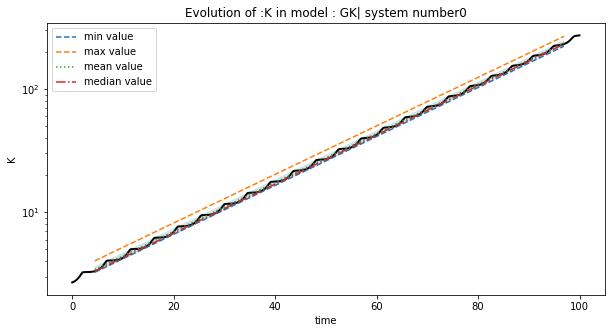

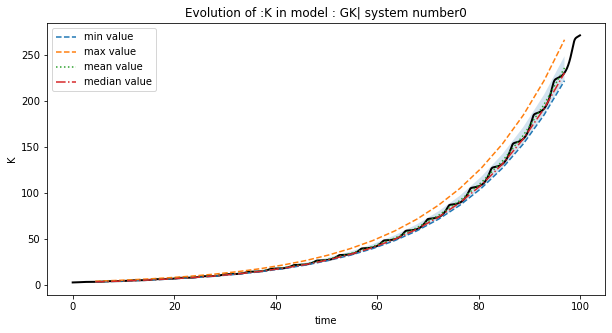

In [39]:
plots.Var(hub, 'K', idx=0, cycles=True, log=True)
plots.Var(hub, 'K', idx=0, cycles=True, log=False)


### Plot phasespace

You can plot phasespace of two variable using : 
`plots.phasespace(hub, x='omega', y='lambda', color='time', idx=0)`
* x is the variable for x axis
* y is the variable for y axis 
* color is the variable than give color to the curve, by default time
* idx is the index of the system

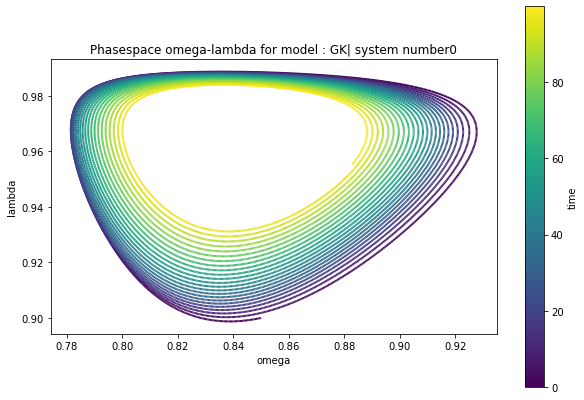

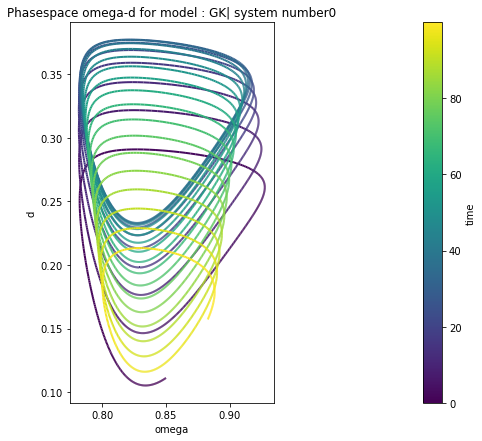

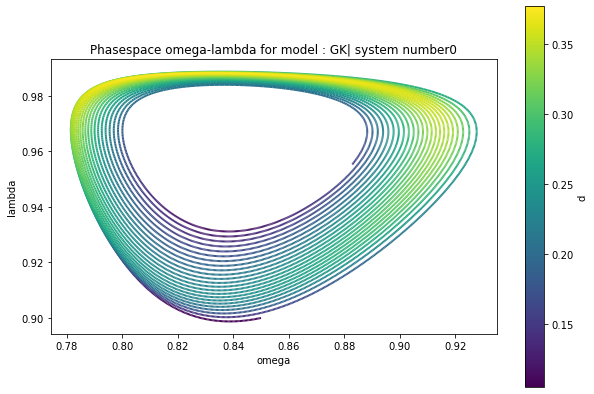

In [40]:
plots.phasespace(hub, x='omega', y='lambda', color='time', idx=0)
plots.phasespace(hub, x='omega', y='d', idx=0)
plots.phasespace(hub, x='omega', y='lambda', color='d', idx=0)

### Automatic plots 

Since the system knows the units of variables, it knows which variables should be plot with which. 
To get access to all variables regroupment per dimensions : 
`groupsofvariable = hub.get_groupsofvariable(returnas=dict)`

#### All phase spaces
Then you can for example plot all the combination of dimensionless variables explicitely added in the system (lambda, omega, d...), in the future the system will be able to creates its own

`plots.AllPhaseSpace(hub, groupsofvariable[''], idx=0)`

In [ ]:
groupsofvariable = hub.get_groupsofvariable(returnas=dict)
plots.AllPhaseSpace(hub, groupsofvariable[''], idx=0)

### All variables of same dimensions 

In [ ]:
plots.ForEachUnitsGroup(hub)


## Saving/Loading a run 

Solver.save(path=...)
sol_load = _core._saveload.load(' ')

In [ ]:
hub.save()

# I WANT TO JUST DO THE RUN

You can execute this without anything else, it'll do all the work for you :)

In [ ]:

# JUST DO A RUN
import _core  
hub = _core.Hub('GK')
hub.run()


# THAT WAS FUN ! I WANT TO DO MY OWN MODEL !

To do so, look at the model tutorial ! it is a ipython notebook in model